# Helmet Detection 

C S Shreejit 
21BTRCL096

In [1]:
import tensorflow as tf

In [9]:
import cv2
import imghdr

In [3]:
data_dir = '/content/drive/MyDrive/data'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
import os
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_dir):
        continue  # Skip non-directory items

    for image in os.listdir(class_dir):
        if image == '.DS_Store':
            continue  # Skip .DS_Store file
        image_path = os.path.join(class_dir, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


Issue with image /content/drive/MyDrive/data/people driving without helmet/new-project-2022-05-25t122401-201-202205825913_202205384533.jpg
Issue with image /content/drive/MyDrive/data/people driving without helmet/images (66).jpeg
Issue with image /content/drive/MyDrive/data/people driving without helmet/images (68).jpeg
Issue with image /content/drive/MyDrive/data/people driving without helmet/image (7).jpeg
Issue with image /content/drive/MyDrive/data/people driving without helmet/images (8).jpeg
Issue with image /content/drive/MyDrive/data/people driving without helmet/images (17).jpeg
Issue with image /content/drive/MyDrive/data/people driving without helmet/image (14).jpeg
Issue with image /content/drive/MyDrive/data/people driving without helmet/images (40).jpeg
Issue with image /content/drive/MyDrive/data/people driving without helmet/images (28).jpeg
Issue with image /content/drive/MyDrive/data/people driving without helmet/images (31).jpeg
Issue with image /content/drive/MyDri

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 242 files belonging to 2 classes.


In [16]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 242 files belonging to 2 classes.


In [18]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')
data_iterator = iter(data)
batch = data_iterator.next()

# batch = data_iterator.next()

Found 242 files belonging to 2 classes.


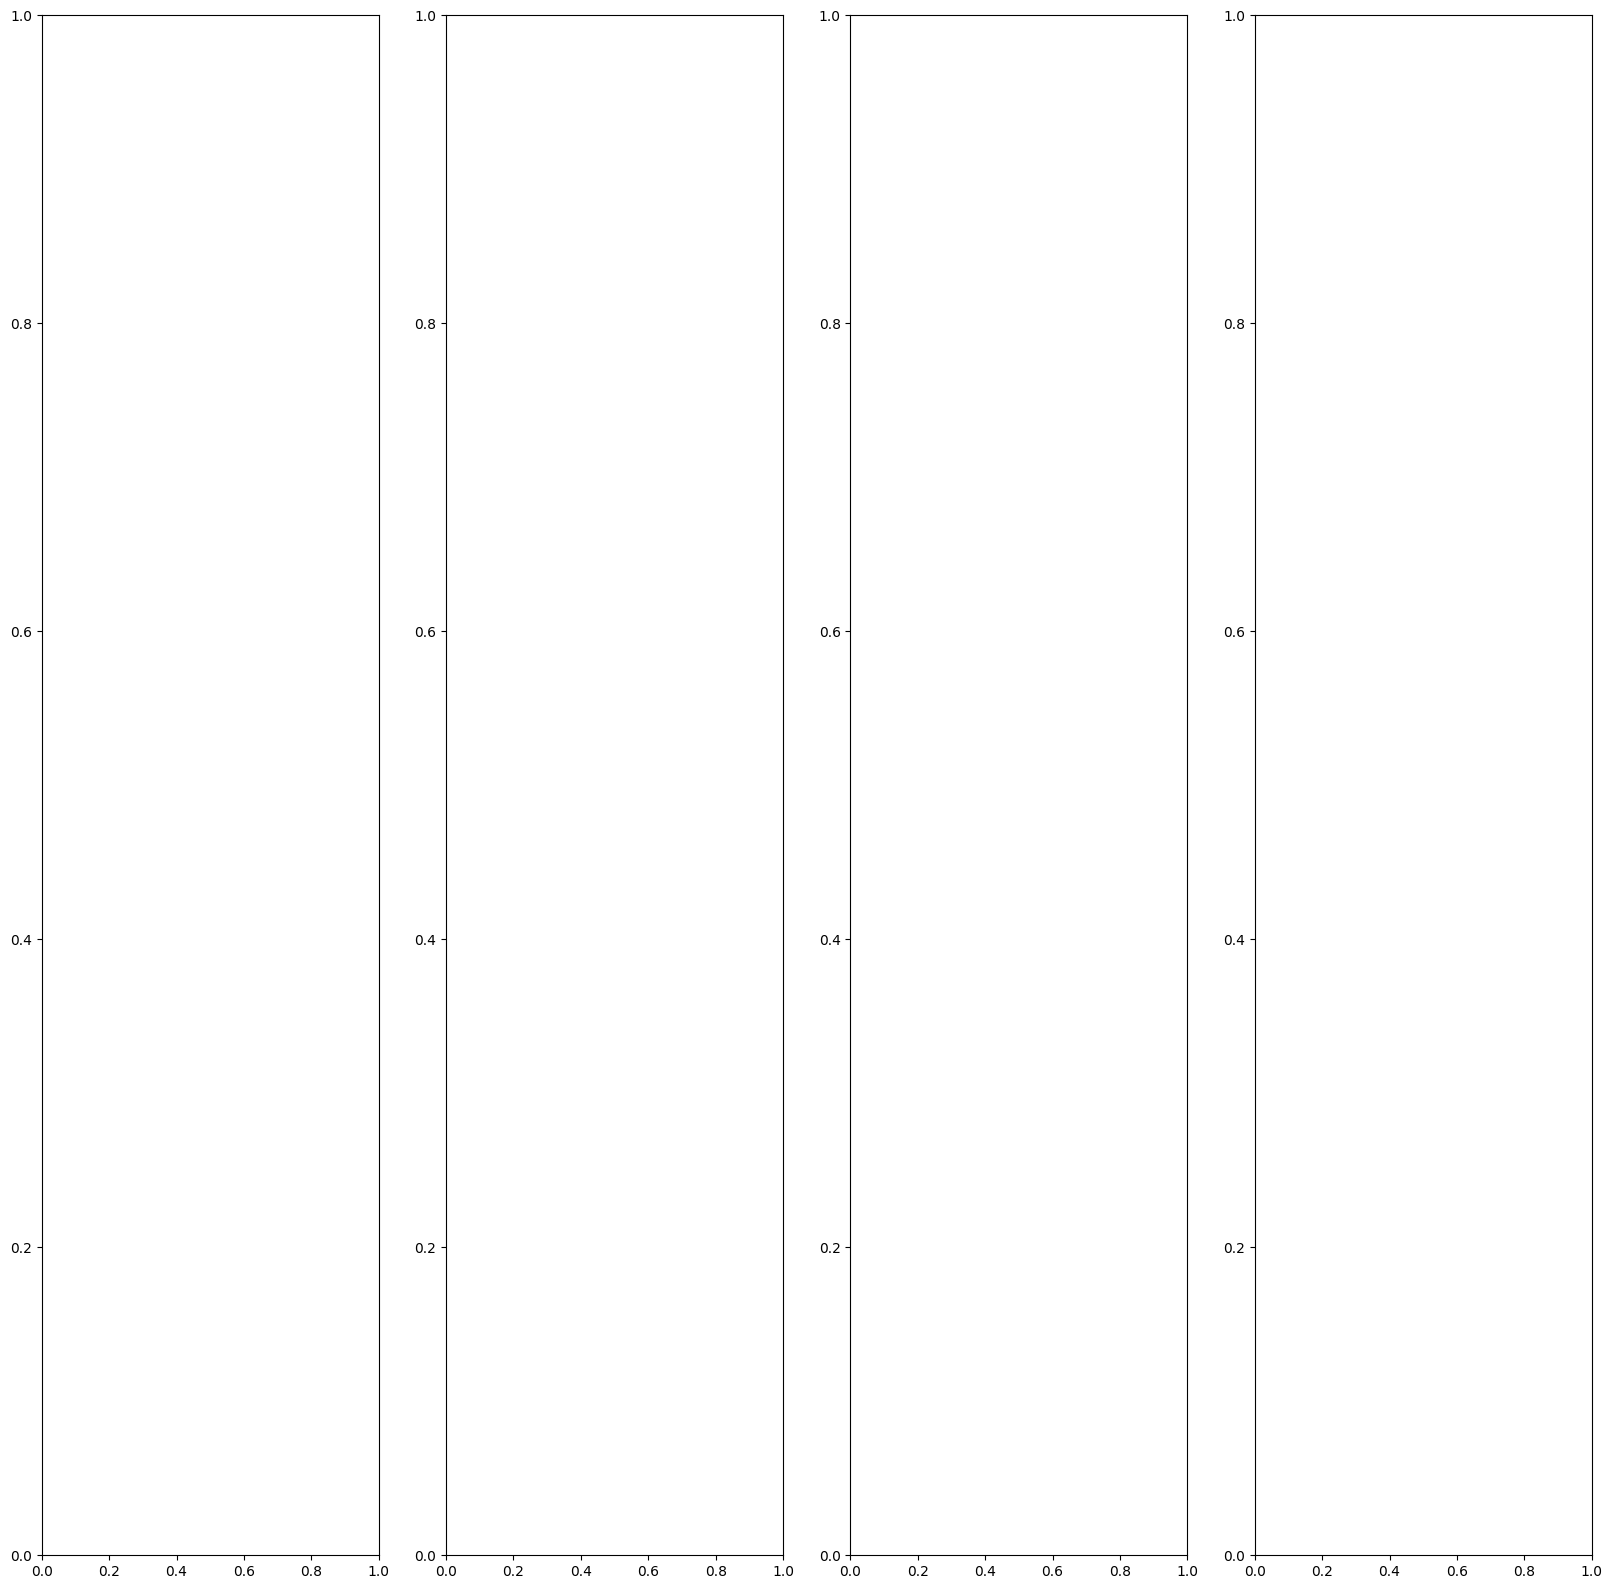

In [23]:
import numpy as np

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  img.numpy()
  img.numpy().astype(int)
    # ax[idx].imshow(img.astype(int))
    # ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [25]:
data.as_numpy_iterator().next()

(array([[[[0.09206495, 0.1473652 , 0.42806372],
          [0.1431679 , 0.19601716, 0.39871323],
          [0.65520835, 0.6904412 , 0.7818934 ],
          ...,
          [0.36243874, 0.37619486, 0.4270527 ],
          [0.        , 0.00358456, 0.0651348 ],
          [0.5989583 , 0.6095282 , 0.67579657]],
 
         [[0.05777708, 0.11307732, 0.39377585],
          [0.15072308, 0.2052246 , 0.40736994],
          [0.68137616, 0.71836007, 0.7979076 ],
          ...,
          [0.36243874, 0.37619486, 0.4270527 ],
          [0.        , 0.00358456, 0.0651348 ],
          [0.5989583 , 0.6095282 , 0.67579657]],
 
         [[0.01819111, 0.07456485, 0.35490555],
          [0.15708199, 0.21351582, 0.41501704],
          [0.7102149 , 0.7492468 , 0.8148717 ],
          ...,
          [0.36243874, 0.37619486, 0.4270527 ],
          [0.        , 0.00358456, 0.0651348 ],
          [0.5989583 , 0.6095282 , 0.67579657]],
 
         ...,
 
         [[0.00316545, 0.01725859, 0.15956864],
          [0.11590

# 5. Split Data

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [27]:
train_size

5

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
del data

# 6. Build Deep Learning Model

In [30]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [36]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
5/5 [==============================] - 24s 3s/step - loss: 0.9800 - accuracy: 0.4812 - val_loss: 0.7006 - val_accuracy: 0.5312
Epoch 2/20
5/5 [==============================] - 18s 3s/step - loss: 0.7040 - accuracy: 0.5125 - val_loss: 0.6882 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 17s 3s/step - loss: 0.6854 - accuracy: 0.5312 - val_loss: 0.6604 - val_accuracy: 0.5625
Epoch 4/20
5/5 [==============================] - 15s 3s/step - loss: 0.6476 - accuracy: 0.6750 - val_loss: 0.6151 - val_accuracy: 0.5625
Epoch 5/20
5/5 [==============================] - 15s 3s/step - loss: 0.5845 - accuracy: 0.7375 - val_loss: 0.5620 - val_accuracy: 0.8125
Epoch 6/20
5/5 [==============================] - 15s 3s/step - loss: 0.5362 - accuracy: 0.7312 - val_loss: 0.3835 - val_accuracy: 0.9688
Epoch 7/20
5/5 [==============================] - 15s 3s/step - loss: 0.4008 - accuracy: 0.9125 - val_loss: 0.3619 - val_accuracy: 0.8750
Epoch 8/20
5/5 [==================

# 8. Plot Performance

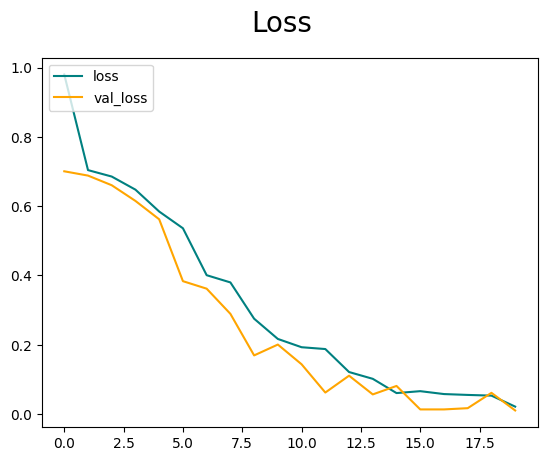

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

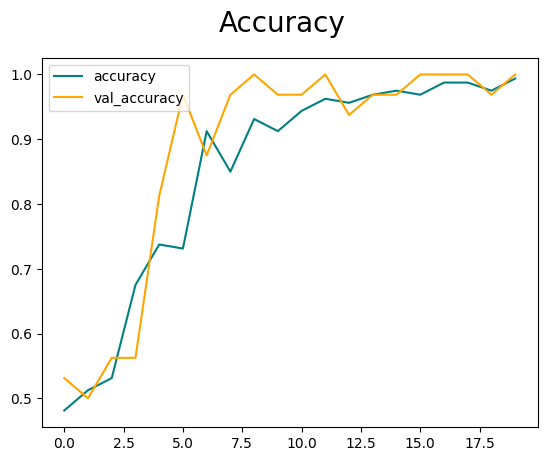

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [43]:
import cv2

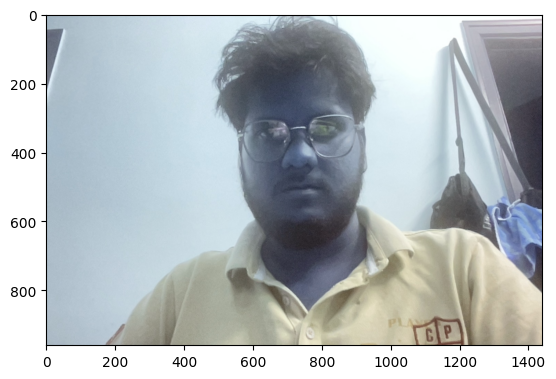

In [45]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/content/2.jpeg')

# Check if img is None
if img is None:
    print("Error: Unable to read the image file.")
else:
    # Display the image
    plt.imshow(img)
    plt.show()


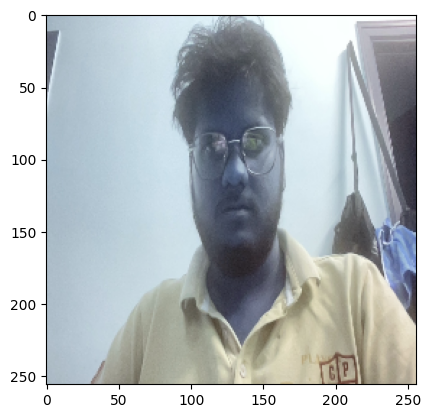

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 147ms/step


yhat

In [49]:
if yhat > 0.5:
    print(f'Predicted class is wearing an helmat')
else:
    print(f'tPredicted class is not wearing helmat')

tPredicted class is not wearing helmat
